In [2]:
import os
import pandas as pd

In [3]:
from glob import glob

tracks_dir = "/playpen-storage/levlevi/player-re-id/src/player_reid/ocr_analysis/full_video_tracks"
tracks = glob(tracks_dir + "/*.txt")

In [17]:
lengths = []
for fp in tracks:
    with open(fp, 'r') as f:
        lines = f.readlines()
    index = ['frame', 'entity_id', 'x1', 'y1', 'width', 'height', 'conf', 'pad2', 'pad3', 'pad4']
    df = pd.read_csv(fp, names=index)[['frame', 'entity_id', 'x1', 'y1', 'width', 'height', 'conf']]
    entities = df.entity_id.unique()
    for entity in entities:
        entity_df = df[df.entity_id == entity]
        lengths.append(len(entity_df))        

print(f"Mean: {sum(lengths)/len(lengths)}")

Mean: 361.8399446494465


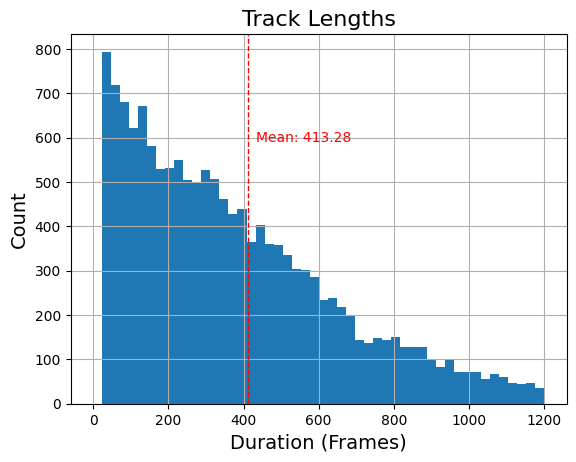

In [25]:
import matplotlib.pyplot as plt
import numpy as np

lengths = np.array(lengths)
lengths_filtered = lengths[lengths > 25]

# Create the histogram
plt.hist(lengths_filtered, bins=50, range=(0, 1200))

# Calculate the mean
mean_length = np.mean(lengths_filtered)

# Plot the mean line
plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=1)

# Add labels and title
plt.xlabel("Duration (Frames)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Track Lengths", fontsize=16)

# Add text for the mean
plt.text(mean_length + 20, max(np.histogram(lengths_filtered, bins=30, range=(0, 1200))[0]) / 2,
         f'Mean: {mean_length:.2f}', color='red')

# Add grid
plt.grid(True)

# Show the plot
plt.show()


array([112, 111, 385, ..., 134,  52,  37])